In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

column_names = [
    "CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS",
    "RAD","TAX","PTRATIO","B","LSTAT"
]

df = pd.DataFrame(data, columns=column_names)
df["Price"] = target   # Target variable

print(df.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [6]:
 df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [7]:
import seaborn as sns
#sns.pairplot(df)

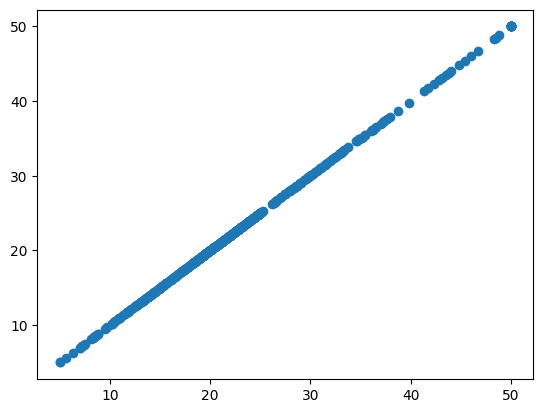

In [8]:
plt.scatter(df['Price'], df['Price'])

In [9]:
X=df.drop('Price' , axis=1)
y=df['Price']

In [10]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [11]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [12]:
#Standarization
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state=23)

In [13]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
112,0.12329,0.0,10.01,0.0,0.547,5.913,92.9,2.3534,6.0,432.0,17.8,394.95,16.21
301,0.03537,34.0,6.09,0.0,0.433,6.590,40.4,5.4917,7.0,329.0,16.1,395.75,9.50
401,14.23620,0.0,18.10,0.0,0.693,6.343,100.0,1.5741,24.0,666.0,20.2,396.90,20.32
177,0.05425,0.0,4.05,0.0,0.510,6.315,73.4,3.3175,5.0,296.0,16.6,395.60,6.29
69,0.12816,12.5,6.07,0.0,0.409,5.885,33.0,6.4980,4.0,345.0,18.9,396.90,8.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,13.67810,0.0,18.10,0.0,0.740,5.935,87.9,1.8206,24.0,666.0,20.2,68.95,34.02
457,8.20058,0.0,18.10,0.0,0.713,5.936,80.3,2.7792,24.0,666.0,20.2,3.50,16.94
40,0.03359,75.0,2.95,0.0,0.428,7.024,15.8,5.4011,3.0,252.0,18.3,395.62,1.98
230,0.53700,0.0,6.20,0.0,0.504,5.981,68.1,3.6715,8.0,307.0,17.4,378.35,11.65


In [14]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
176,0.07022,0.0,4.05,0.0,0.510,6.020,47.2,3.5549,5.0,296.0,16.6,393.23,10.11
311,0.79041,0.0,9.90,0.0,0.544,6.122,52.8,2.6403,4.0,304.0,18.4,396.90,5.98
94,0.04294,28.0,15.04,0.0,0.464,6.249,77.3,3.6150,4.0,270.0,18.2,396.90,10.59
139,0.54452,0.0,21.89,0.0,0.624,6.151,97.9,1.6687,4.0,437.0,21.2,396.90,18.46
232,0.57529,0.0,6.20,0.0,0.507,8.337,73.3,3.8384,8.0,307.0,17.4,385.91,2.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,5.66637,0.0,18.10,0.0,0.740,6.219,100.0,2.0048,24.0,666.0,20.2,395.69,16.59
100,0.14866,0.0,8.56,0.0,0.520,6.727,79.9,2.7778,5.0,384.0,20.9,394.76,9.42
367,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33
375,19.60910,0.0,18.10,0.0,0.671,7.313,97.9,1.3163,24.0,666.0,20.2,396.90,13.44


In [15]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [16]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
 from sklearn.linear_model import LinearRegression

In [18]:
lin=LinearRegression()
lin.fit(X_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
#print coeficient & intercept / shows how much weight My moel has assigned to each feature
print(lin.coef_)

[-0.80023451  1.11525185  0.17614635  0.86259915 -2.17224763  2.76926673
  0.05893248 -3.05784594  2.41331299 -1.57672985 -1.8824134   1.149236
 -3.79919597]


In [20]:
print(lin.intercept_)

22.57730870712401


In [21]:
#on which parameter my model has ben trained
print(lin.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False, 'tol': 1e-06}


In [22]:
pred=lin.predict(X_test) #Prediction

In [23]:
pred

array([25.35043765, 26.83833359, 27.10368767, 17.05066006, 38.42905713,
       16.83684071, 20.28230346, 28.85331728, 33.86172719, 37.91088477,
       16.61556224, 27.60407663, 25.53012805, 26.13471416, 21.2983611 ,
       19.39542337, 30.98045197, 30.83621704, 28.95890969, 28.77444   ,
       19.34842135, 17.83796497, 24.7198097 , 24.1404265 , 14.1028617 ,
       22.2594556 , 32.78502016, 28.4873881 , 29.61115997, 39.16707405,
       18.61279872, 15.45352085, 20.22895516, 20.27210041, 20.40480922,
       37.49249063, 24.88198355, 30.79999434, 13.49608377, 36.08355222,
        9.04513614, 13.96171411, 11.6990801 , 19.4493558 , 36.09194646,
       20.15945865, 12.13363415, 21.80391404, 13.3936064 , 38.99381065,
       22.52370873,  3.29074064, 17.90741148, 18.4844985 , 23.9222168 ,
       32.72680219,  6.16572092, 21.30202596, 17.74897464, 22.67145843,
       17.62450575, 21.4303649 , 21.03638856, 43.2537295 , 30.61908982,
       29.32662137, 21.06090509, 16.89907536, 30.97334224, 14.00

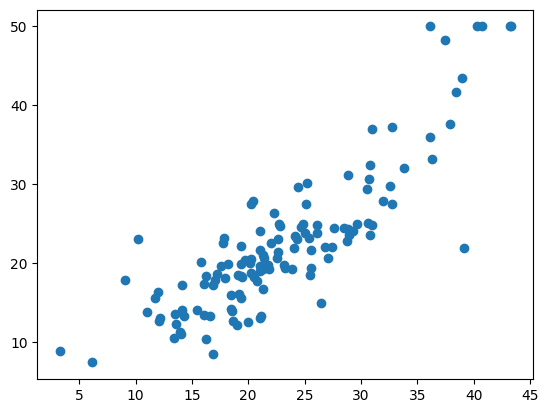

In [24]:
plt.scatter(pred , y_test) #Idealy show linear model / straight light 

In [25]:
#Predication with residual
residual=y_test-pred

In [26]:
residual

176    -2.150438
311    -4.738334
94     -6.503688
139     0.749340
232     3.270943
         ...    
442    -0.956434
100     2.357975
367    12.863525
375   -11.443965
133     2.153366
Name: Price, Length: 127, dtype: float64

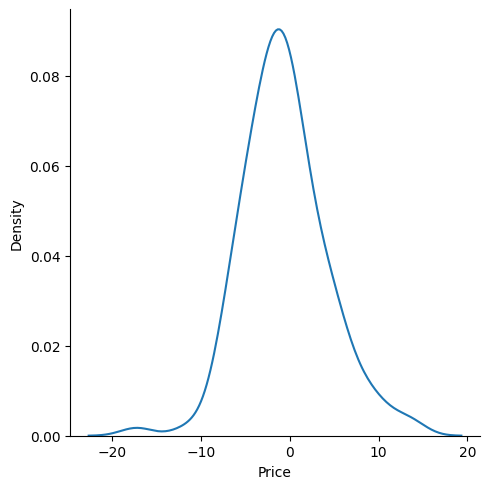

In [27]:
sns.displot(residual,kind='kde')

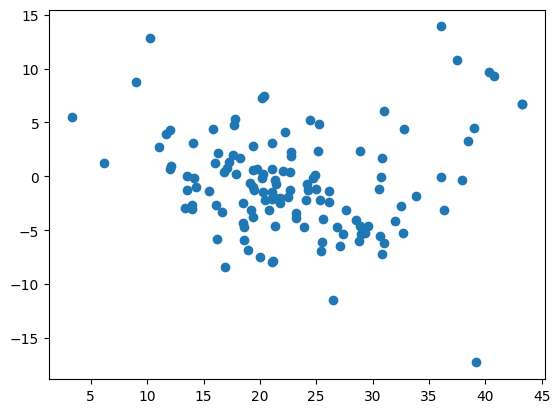

In [28]:
plt.scatter(pred , residual)

In [29]:
#metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_squared_error(y_test , pred))
print(mean_absolute_error(y_test , pred))
print(np.sqrt(mean_squared_error(y_test , pred)))

22.77078435193957
3.653485923459935
4.771874301774887


In [30]:
#R2 square & adjused R2 sqaure
score=r2_score(y_test , pred)
print(score)

0.7202790339879435


In [31]:
df.iloc[0,:]

CRIM         0.00632
ZN          18.00000
INDUS        2.31000
CHAS         0.00000
NOX          0.53800
RM           6.57500
AGE         65.20000
DIS          4.09000
RAD          1.00000
TAX        296.00000
PTRATIO     15.30000
B          396.90000
LSTAT        4.98000
Price       24.00000
Name: 0, dtype: float64

In [32]:
lin.predict(sc.transform(X.iloc[1,:].values.reshape(1,-1)))

C:\Users\Admin\tf-env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([25.0008112])

In [33]:
sc.transform(X.iloc[1,:].values.reshape(1,-1))

C:\Users\Admin\tf-env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.4184683 , -0.50207866, -0.57864602, -0.28784917, -0.69402324,
         0.22624221,  0.40932779,  0.50412268, -0.84957533, -0.97651582,
        -0.30136011,  0.43026001, -0.48192435]])

In [34]:
#Deployment 
import pickle

In [35]:
pickle.dump(sc,open('scaler_D.pkl', 'wb'))
pickle.dump(lin,open('model_d.pkl','wb')) #serialization ->Saving & loading model -> ->Saving & loading model

In [36]:
pickel_model=pickle.load(open('model_d.pkl','rb'))

In [37]:
pickel_model.predict(sc.transform(X.iloc[1,:].values.reshape(1,-1)))

C:\Users\Admin\tf-env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([25.0008112])